<a href="https://colab.research.google.com/github/gabrielvieiraf/ProjetosPython/blob/master/GoogleColab/MachineLearning/Machine_Learning02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iniciando com Machine Learning 02**

## Exemplo 03

### Tratando dados

In [4]:
import pandas as pd

dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

# Visualizando dados
print(dados.head(10))

# Renomeando Colunas 
dados.rename(columns = {'expected_hours':'horas_esperadas',
             'price':'preco'}, inplace= True)

# Invertendo valores no Dataframe
troca = {
    0:1,
    1:0
}
# Realizando troca dos 0 e 1
dados['finalizado'] = dados['unfinished'].map(troca)

# Deletando coluna
del dados['unfinished']

# Visualizando dados
dados.head(10)

   unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170
5           1              33    173
6           1              64   1965
7           1              99   1993
8           1              45    278
9           0              96  12479


,horas_esperadas,preco,finalizado
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
5,33,173,0
6,64,1965,0
7,99,1993,0
8,45,278,0
9,96,12479,1


### Criando modelo

In [5]:
# Declarando x e y
x = dados[['horas_esperadas','preco']]
y = dados[['finalizado']]

# Método 02
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split (x, y,
                                                         random_state= SEED,
                                                         test_size= 0.25,
                                                         stratify = y)

print('Treinaremos com %d elementos e testaremos com %d elementos.' % (len(treino_x), len(teste_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos.


In [7]:
# Importando sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Criando modelo
modelo = LinearSVC()

# Treinando o robô
modelo.fit(treino_x,treino_y.values.ravel())

previsoes = modelo.predict(teste_x)
previsoes.shape[0]

# Método 02 para taxa de acerto
taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

O acerto foi de: 54.44 %


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Criando baseline

In [12]:
import numpy as np
previsao_de_base = np.ones(540)

# Método 02 para taxa de acerto
taxa_de_acerto = accuracy_score(teste_y, previsao)*100

print("O baseline foi de: %.2f" % taxa_de_acerto,'%' )

O baseline foi de: 52.59 %


### Visualizando dados

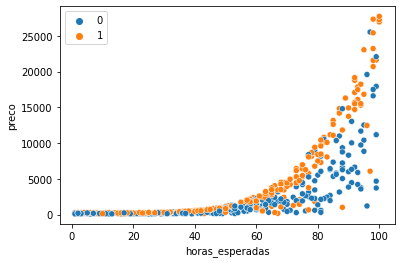

In [26]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', hue = teste_y.values.ravel(), data= teste_x)

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()


In [50]:
pixels = 100

eixo_x = np.arange(x_min, x_max, ( x_max - x_min ) / pixels)
eixo_y = np.arange(y_min, y_max, ( y_max - y_min ) / pixels)

xx, yy = np.meshgrid(eixo_x,eixo_y)

pontos = np.c_[xx.ravel(),yy.ravel()]

Z = modelo.predict(pontos)

Z.reshape(xx.shape)
Z

array([0, 0, 0, ..., 1, 1, 1])

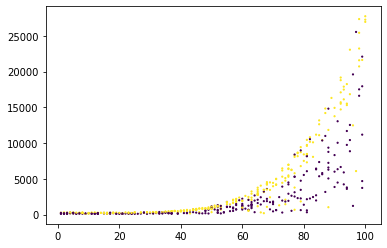

In [53]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c= teste_y.values, s= 1.4)